<a href="https://colab.research.google.com/github/katnguyen143/animal_crossing_pixel/blob/master/datagood_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Climate Change Data Analysis Project**

By: Fiona Chang and Kat Nguyen

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme(color_codes = True)
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
#importing the data
from google.colab import files
uploaded = files.upload()

Saving co2-mm-mlo_csv.csv to co2-mm-mlo_csv.csv


In [ ]:
import io
co2_mm_mlo = pd.read_csv(io.BytesIO(uploaded['co2-mm-mlo_csv.csv']))
co2_mm_mlo

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1
...,...,...,...,...,...,...
722,2018-05-01,2018.375,411.24,411.24,407.91,24
723,2018-06-01,2018.458,410.79,410.79,408.49,29
724,2018-07-01,2018.542,408.71,408.71,408.32,27
725,2018-08-01,2018.625,406.99,406.99,408.90,30


In [ ]:
# clean dataset
co2_mm_mlo['Time'] = pd.to_datetime(co2_mm_mlo['Date'])
co2_mm_mlo2 = co2_mm_mlo[co2_mm_mlo["Average"] != -99.99]
co2_mm_mlo2.head()

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days,Time
0,1958-03-01,1958.208,315.71,315.71,314.62,-1,1958-03-01
1,1958-04-01,1958.292,317.45,317.45,315.29,-1,1958-04-01
2,1958-05-01,1958.375,317.50,317.50,314.71,-1,1958-05-01
4,1958-07-01,1958.542,315.86,315.86,314.98,-1,1958-07-01
5,1958-08-01,1958.625,314.93,314.93,315.94,-1,1958-08-01


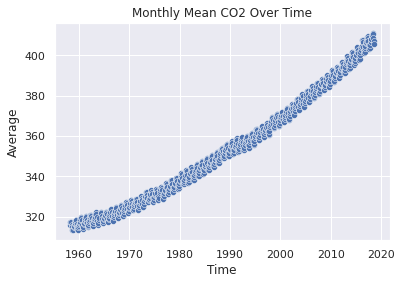

In [ ]:
# create scatterplot (seaborn)
sns.scatterplot(data=co2_mm_mlo2, x='Time', y='Average').set(title='Monthly Mean CO2 Over Time')
sns.set(rc = {'figure.figsize':(15,8)}) # adjust plot size

[Text(0.5, 1.0, 'Monthly Mean CO2 Over Time')]

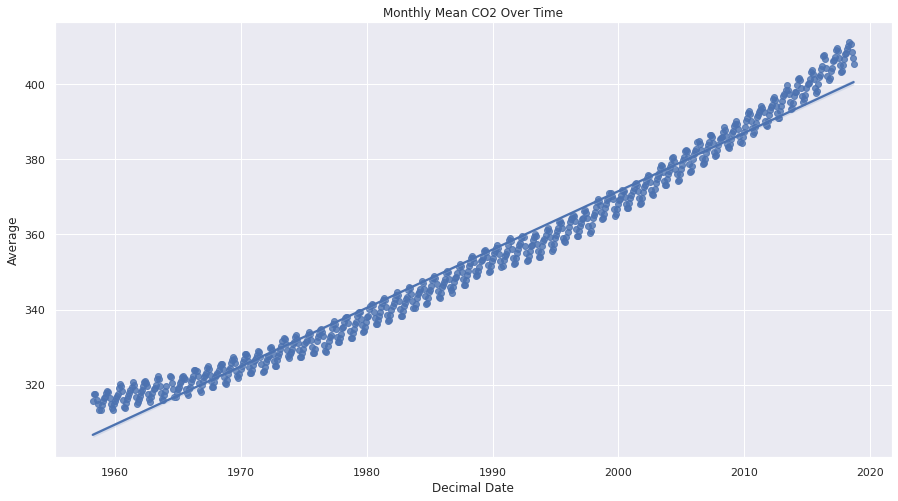

In [ ]:
# plot data and a linear regression model fit
sns.regplot(data=co2_mm_mlo2, x='Decimal Date', y='Average').set(title='Monthly Mean CO2 Over Time')

[Text(0.5, 1.0, 'Linear Regression Residual Plot')]

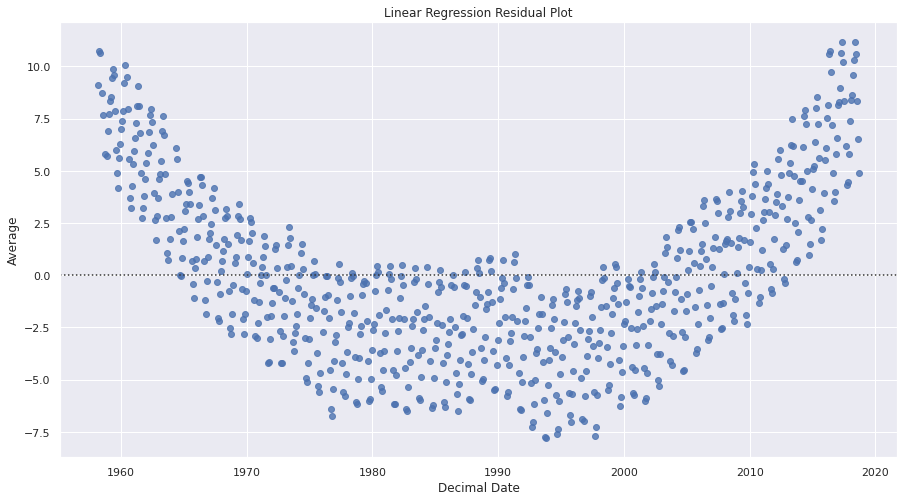

In [ ]:
# residual plot
sns.residplot(data=co2_mm_mlo2, x='Decimal Date', y='Average').set(title='Linear Regression Residual Plot')

In [ ]:
train, test = train_test_split(co2_mm_mlo2, test_size=0.2, random_state=85)
X_train = train.loc[:, ['Decimal Date']]
y_train = train['Average']
X_test = test.loc[:, ['Decimal Date']]
y_test = test['Average']

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
print("The RMSE for the linear regression model is: " + str(lin_reg_rmse))

The RMSE for the linear regression model is: 4.298054534176779


The residual plot shows a clear pattern and the RMSE is a bit high, meaning a linear regression model is not a good fit for the data. Next, we'll try a polynomial regression model to see if it's a better fit.

[Text(0.5, 1.0, 'Monthly Mean CO2 Over Time')]

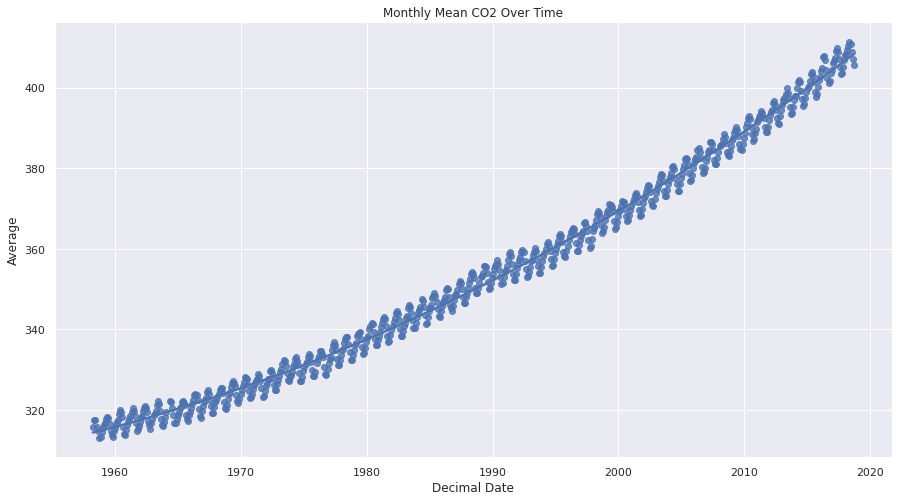

In [ ]:
# the residual plot doesn't look too good, trying order of 2
sns.regplot(data=co2_mm_mlo2, x='Decimal Date', y='Average', order=2).set(title='Monthly Mean CO2 Over Time')

[Text(0.5, 1.0, 'Polynomial Regression Residual Plot')]

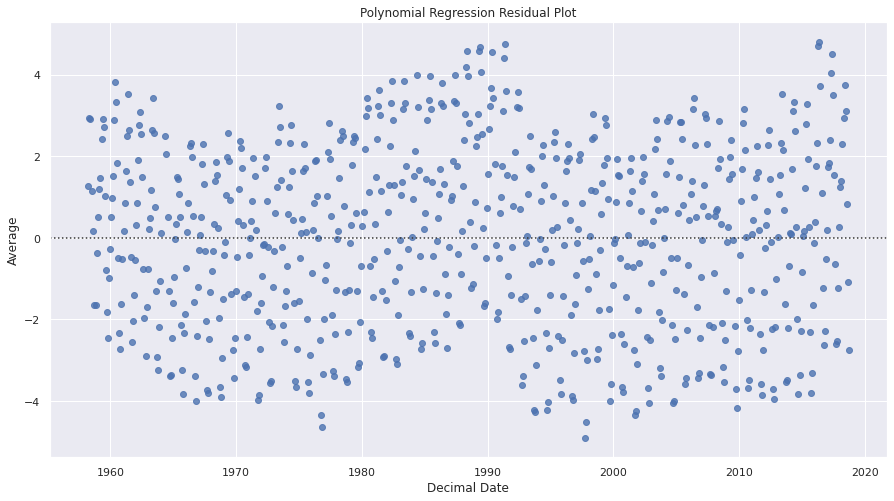

In [ ]:
# that looks a lot better. we'll do it on the train_test_split now.
sns.residplot(data=co2_mm_mlo2, x='Decimal Date', y='Average', order=2).set(title='Polynomial Regression Residual Plot')

In [ ]:
# creating train and test sets, setting degree to 2 since it's not linear
train, test = train_test_split(co2_mm_mlo2, test_size=0.2, random_state=85)
X_train = train.loc[:, ['Decimal Date']]
y_train = train['Average']
X_test = test.loc[:, ['Decimal Date']]
y_test = test['Average']
poly = PolynomialFeatures(degree=2, include_bias=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Training Set')]

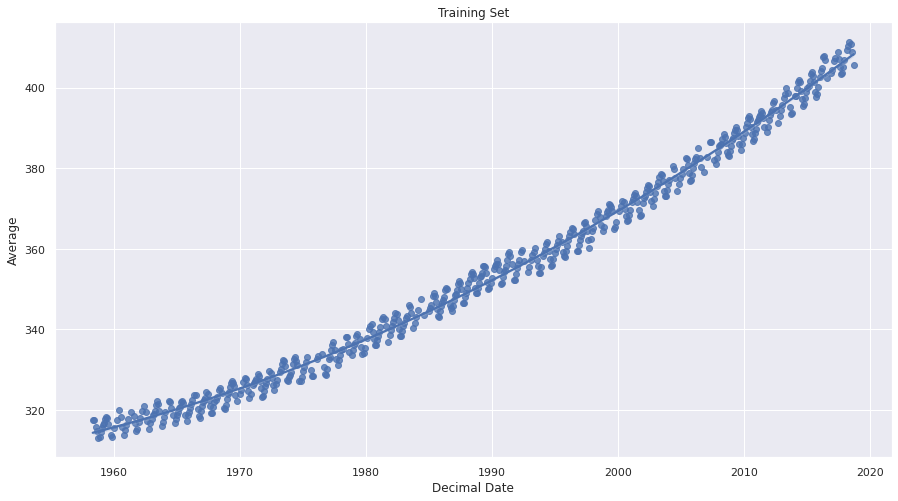

In [ ]:
# first, show the plot for the training set
sns.regplot(X_train, y_train, order=2).set(title='Training Set')

In [ ]:
# turning sets of X into a 2-D array bc apparently we have to
# pretty much following this: https://data36.com/polynomial-regression-python-scikit-learn/
poly_features = poly.fit_transform(X_train.values.reshape(-1, 1))
poly_features2 = poly.fit_transform(X_test.values.reshape(-1, 1))

Text(0, 0.5, 'CO2 Monthly Mean')

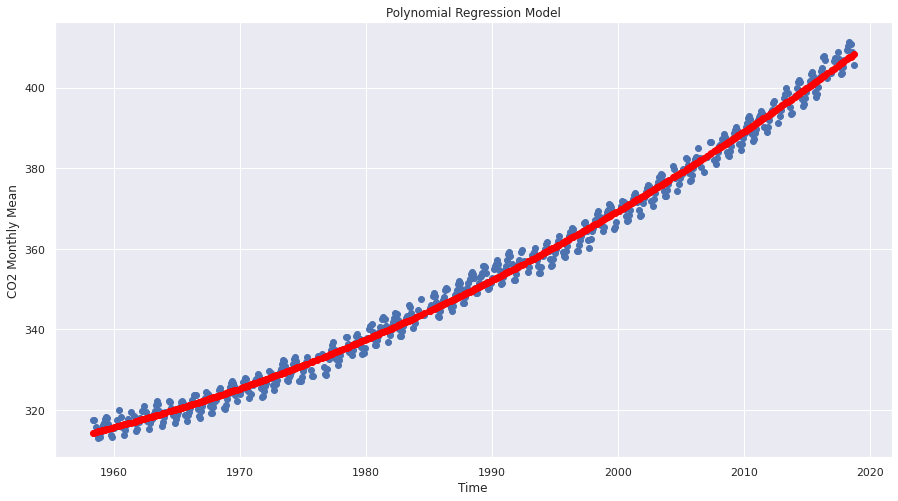

In [ ]:
# creating the regression model and adding in prediction
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)
y_predicted = poly_reg_model.predict(poly_features)
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_predicted, color='red')
plt.title('Polynomial Regression Model')
plt.xlabel('Time')
plt.ylabel('CO2 Monthly Mean')

In [ ]:
# trying it on the test set, finding root mean square error
poly_reg_y_predicted = poly_reg_model.predict(poly_features2)
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print("The RMSE for the polynomial regression model is: " + str(poly_reg_rmse))

The RMSE for the polynomial regression model is: 2.2276814287042286


In [ ]:
# use our model to predict average temperatures for dates beyond the present data
X_train_future = pd.concat([pd.DataFrame([1960+i], columns=["Decimal Date"]) for i in range(141)], ignore_index=True)
p_features = poly.fit_transform(X_train_future.values.reshape(-1, 1))
y_predicted_future = poly_reg_model.predict(p_features)

Text(0, 0.5, 'Predicted CO2 Monthly Mean')

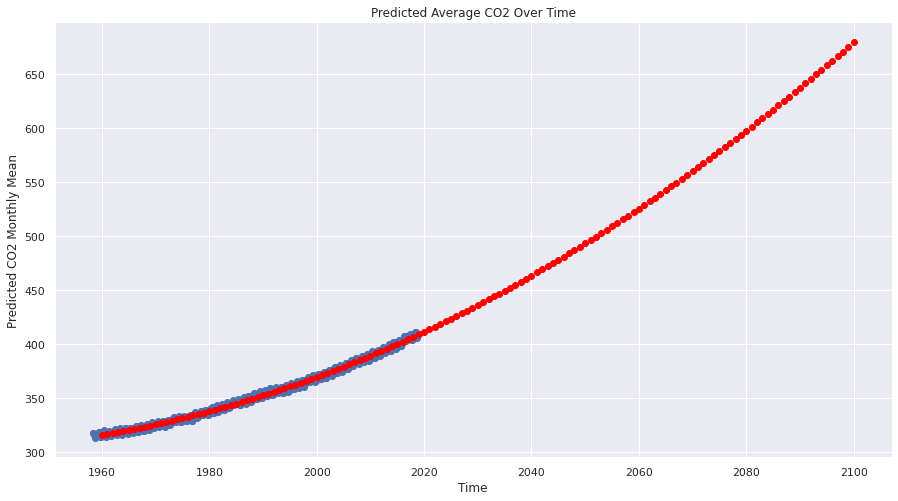

In [ ]:
# plot the new model
plt.scatter(X_train, y_train)
plt.scatter(X_train_future, y_predicted_future, color='red')
plt.title('Predicted Average CO2 Over Time')
plt.xlabel('Time')
plt.ylabel('Predicted CO2 Monthly Mean')

The following function uses our regression model to predict CO2 levels beyond the years included in the original dataset, up to the year 2100:

In [ ]:
# function: plug in a year to get the predicted co2 levels
X_train_future['prediction'] = y_predicted_future
def predict_temp(year):
  print("CO2 Prediction for the year " + str(year) + ": " + str(X_train_future.loc[(X_train_future['Decimal Date'] == year), 'prediction'].iloc[0]))

See what CO2 levels our model predicts for different years!

In [ ]:
predict_temp(2030)

CO2 Prediction for the year 2030: 435.99772902185214


In [ ]:
predict_temp(2100)

CO2 Prediction for the year 2100: 679.4508404567241
